In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### Data Loading

In [59]:
df = pd.read_csv('data/skygeni_sales_data.csv')
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deal_id           5000 non-null   object
 1   created_date      5000 non-null   object
 2   closed_date       5000 non-null   object
 3   sales_rep_id      5000 non-null   object
 4   industry          5000 non-null   object
 5   region            5000 non-null   object
 6   product_type      5000 non-null   object
 7   lead_source       5000 non-null   object
 8   deal_stage        5000 non-null   object
 9   deal_amount       5000 non-null   int64 
 10  sales_cycle_days  5000 non-null   int64 
 11  outcome           5000 non-null   object
dtypes: int64(2), object(10)
memory usage: 468.9+ KB


### Exploratory Data Analysis (EDA)

C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

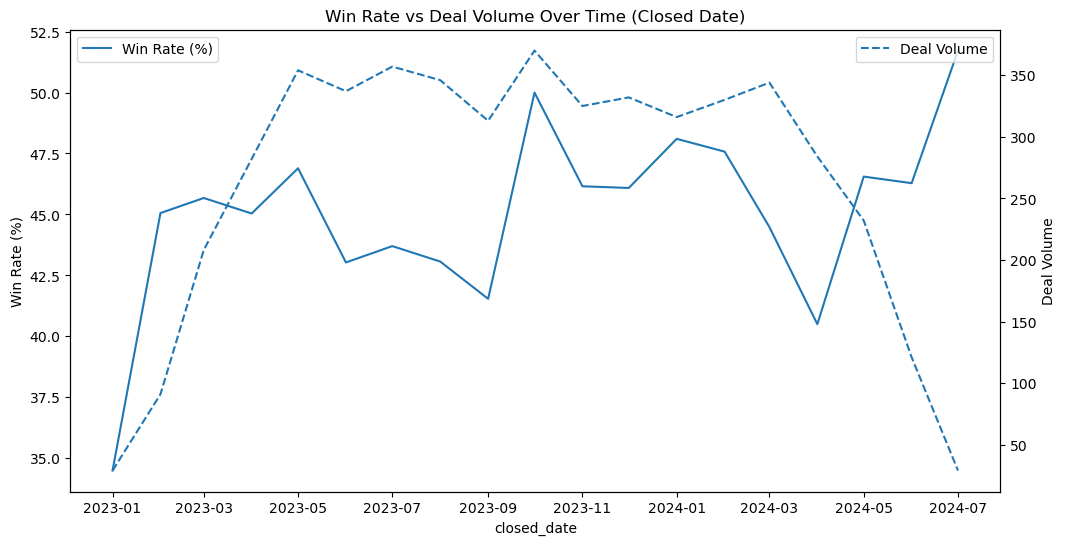

C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manjunath\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

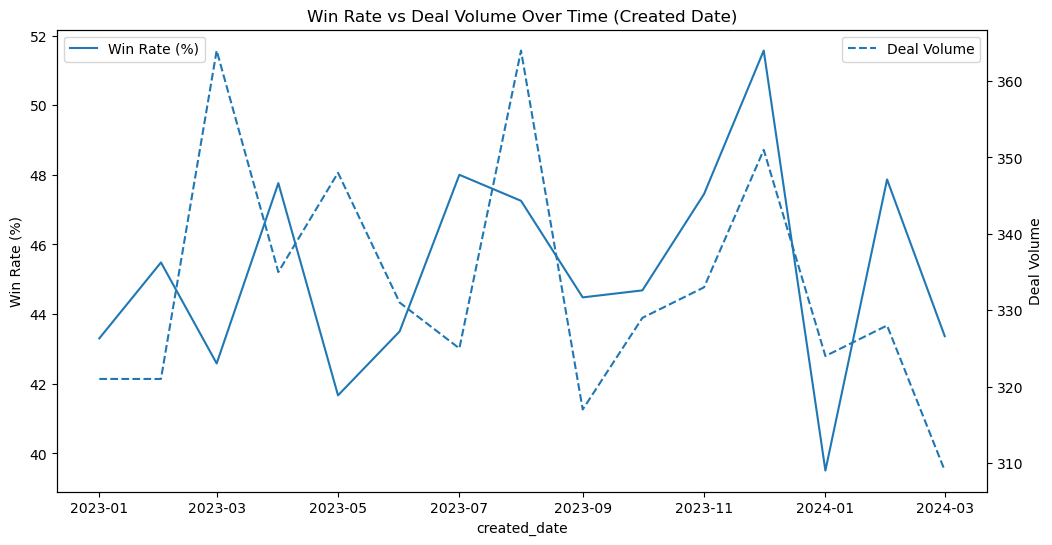

In [64]:
df['closed_date'] = pd.to_datetime(df['closed_date'])
df['outcome_binary'] = df['outcome'].apply(lambda x: 1 if x == 'Won' else 0)

# Monthly aggregation by closed_date
monthly_closed = df.groupby(df['closed_date'].dt.to_period('M')).agg(
    win_rate=('outcome_binary', 'mean'),
    volume=('deal_id', 'count')
).reset_index()

monthly_closed['closed_date'] = monthly_closed['closed_date'].dt.to_timestamp()
monthly_closed['win_rate_pct'] = monthly_closed['win_rate'] * 100

plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='closed_date', y='win_rate_pct', data=monthly_closed, label='Win Rate (%)')
ax2 = ax1.twinx()
sns.lineplot(x='closed_date', y='volume', data=monthly_closed, ax=ax2, linestyle='--', label='Deal Volume')

ax1.set_title('Win Rate vs Deal Volume Over Time (Closed Date)')
ax1.set_ylabel('Win Rate (%)')
ax2.set_ylabel('Deal Volume')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


df['created_date'] = pd.to_datetime(df['created_date'])

# Monthly aggregation by created_date
monthly_created = df.groupby(df['created_date'].dt.to_period('M')).agg(
    win_rate=('outcome_binary', 'mean'),
    volume=('deal_id', 'count')
).reset_index()

monthly_created['created_date'] = monthly_created['created_date'].dt.to_timestamp()
monthly_created['win_rate_pct'] = monthly_created['win_rate'] * 100

plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='created_date', y='win_rate_pct', data=monthly_created, label='Win Rate (%)')
ax2 = ax1.twinx()
sns.lineplot(x='created_date', y='volume', data=monthly_created, ax=ax2, linestyle='--', label='Deal Volume')

ax1.set_title('Win Rate vs Deal Volume Over Time (Created Date)')
ax1.set_ylabel('Win Rate (%)')
ax2.set_ylabel('Deal Volume')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


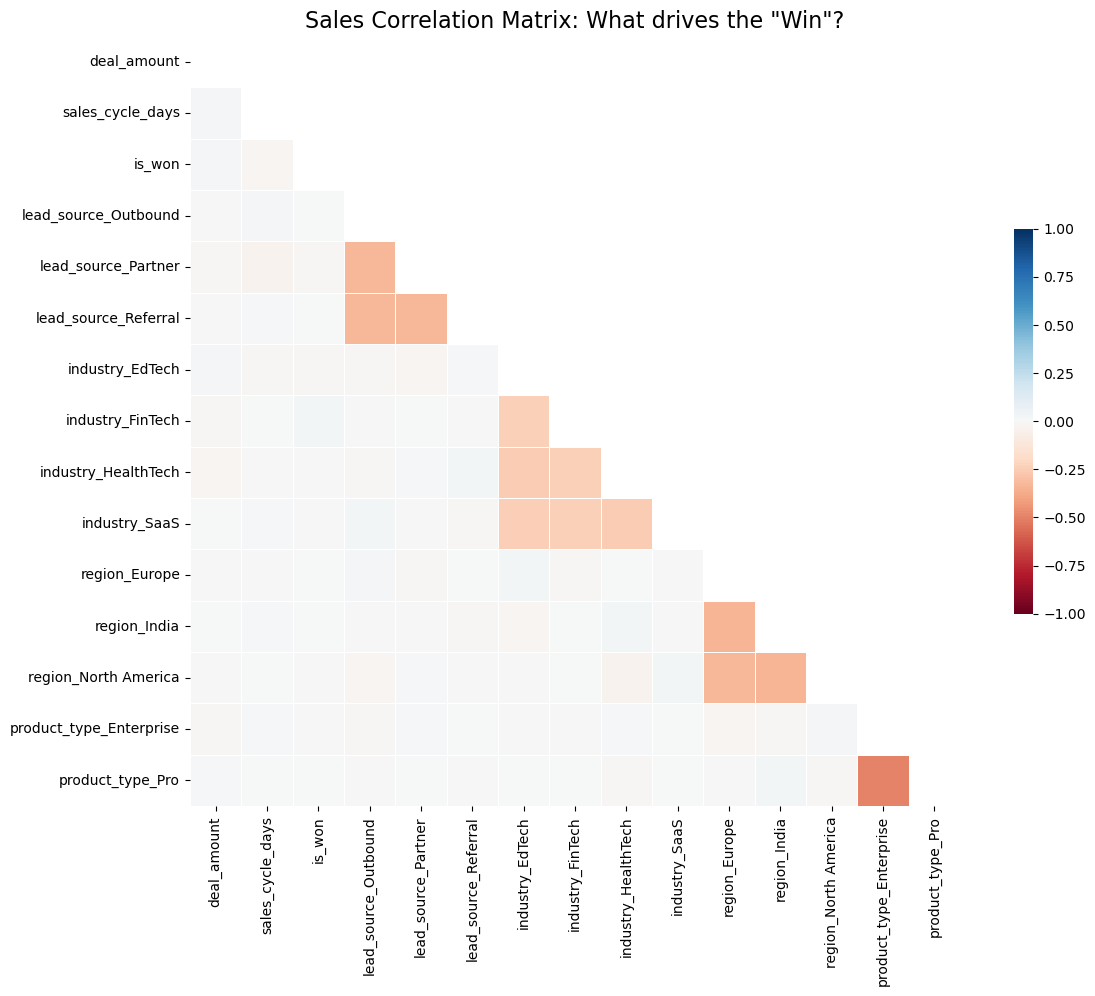

Top Positive Drivers (Correlated with Winning):
is_won                  1.000000
industry_FinTech        0.023594
deal_amount             0.016007
region_India            0.005476
region_Europe           0.003677
lead_source_Referral    0.003102
Name: is_won, dtype: float64

Top Negative Drivers (Correlated with Losing):
sales_cycle_days          -0.016075
lead_source_Partner       -0.015095
industry_EdTech           -0.011062
industry_HealthTech       -0.007132
region_North America      -0.005371
product_type_Enterprise   -0.004061
Name: is_won, dtype: float64


In [75]:
corr_df = df.copy()

# 1 = Won, 0 = Lost
corr_df['is_won'] = corr_df['outcome'].apply(lambda x: 1 if x == 'Won' else 0)

cols_to_encode = ['lead_source', 'industry', 'region', 'product_type']
corr_df = pd.get_dummies(corr_df, columns=cols_to_encode, drop_first=True)

numeric_cols = ['deal_amount', 'sales_cycle_days', 'is_won']

numeric_cols.extend([col for col in corr_df.columns if col not in df.columns])

corr_matrix = corr_df[numeric_cols].corr()

plt.figure(figsize=(14, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=False, 
    fmt=".2f", 
    cmap='RdBu', 
    vmin=-1, 
    vmax=1, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)

plt.title('Sales Correlation Matrix: What drives the "Win"?', fontsize=16)
plt.show()

print("Top Positive Drivers (Correlated with Winning):")
print(corr_matrix['is_won'].sort_values(ascending=False).head(6))

print("\nTop Negative Drivers (Correlated with Losing):")
print(corr_matrix['is_won'].sort_values(ascending=True).head(6))


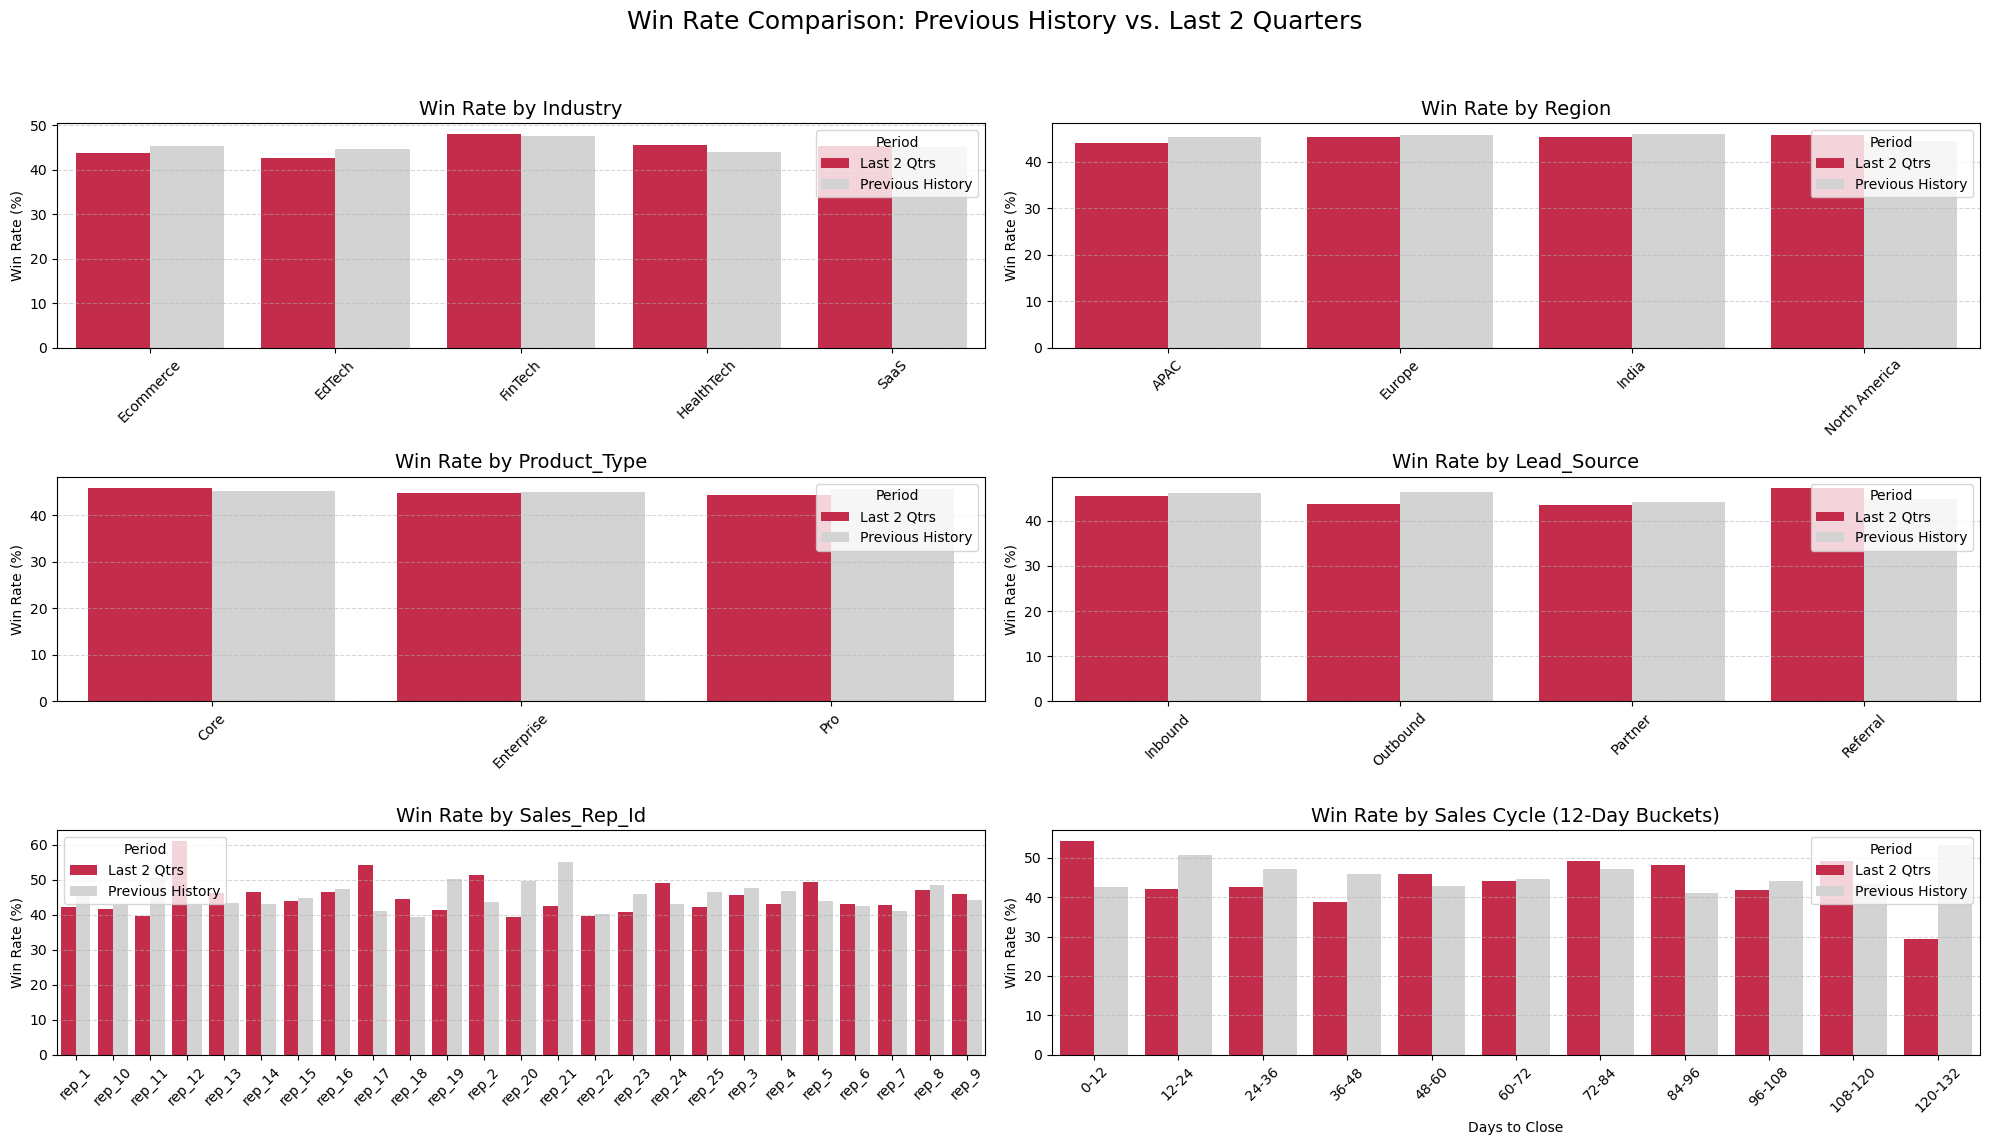


--- BIGGEST DROPS IN WIN RATE (Delta Analysis) ---
Period  Previous History Last 2 Qtrs    Diff
120-132            53.3%       29.4%  -23.9%
rep_21             55.0%       42.6%  -12.4%
rep_11             50.4%       39.7%  -10.7%
rep_20             49.7%       39.3%  -10.4%
rep_19             50.3%       41.5%   -8.8%
12-24              50.8%       42.2%   -8.7%
36-48              46.0%       38.7%   -7.3%
rep_23             45.9%       40.8%   -5.1%
24-36              47.2%       42.6%   -4.7%
rep_1              46.8%       42.1%   -4.6%
rep_25             46.6%       42.1%   -4.5%
rep_4              46.7%       43.1%   -3.6%


C:\Users\Manjunath\AppData\Local\Temp\ipykernel_31556\1987817822.py:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(delta_df[['Previous History', 'Last 2 Qtrs', 'Diff']].head(12).applymap(lambda x: "{:.1%}".format(x) if pd.notnull(x) else "-"))


In [69]:
df['closed_date'] = pd.to_datetime(df['closed_date'])
df['win_flag'] = df['outcome'].apply(lambda x: 1 if x == 'Won' else 0)

max_date = df['closed_date'].max()
six_months_ago = max_date - pd.DateOffset(months=6)

def classify_period(date):
    if date >= six_months_ago:
        return 'Last 2 Qtrs'
    else:
        return 'Previous History'

df['Period'] = df['closed_date'].apply(classify_period)
df['cycle_bucket_start'] = (df['sales_cycle_days'] // 12) * 12
df['cycle_label'] = df['cycle_bucket_start'].astype(str) + '-' + (df['cycle_bucket_start'] + 12).astype(str)

cat_columns = ['industry', 'region', 'product_type', 'lead_source', 'sales_rep_id']

fig, axes = plt.subplots(3,2, figsize=(20, 12))
fig.suptitle('Win Rate Comparison: Previous History vs. Last 2 Quarters', fontsize=18)
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    agg_data = df.groupby([col, 'Period'])['win_flag'].mean().reset_index()
    agg_data['win_rate_pct'] = agg_data['win_flag'] * 100
    
    sns.barplot(x=col, y='win_rate_pct', hue='Period', data=agg_data, ax=axes[i], 
                palette={'Previous History': 'lightgrey', 'Last 2 Qtrs': 'crimson'})
    
    axes[i].set_title(f'Win Rate by {col.title()}', fontsize=14)
    axes[i].set_ylabel('Win Rate (%)')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

cycle_agg = df.groupby(['cycle_bucket_start', 'cycle_label', 'Period'])['win_flag'].mean().reset_index()
cycle_agg['win_rate_pct'] = cycle_agg['win_flag'] * 100
cycle_agg = cycle_agg.sort_values('cycle_bucket_start') # Ensure 0-12 comes before 100-112

sns.barplot(x='cycle_label', y='win_rate_pct', hue='Period', data=cycle_agg, ax=axes[5],
            palette={'Previous History': 'lightgrey', 'Last 2 Qtrs': 'crimson'})

axes[5].set_title('Win Rate by Sales Cycle (12-Day Buckets)', fontsize=14)
axes[5].set_ylabel('Win Rate (%)')
axes[5].set_xlabel('Days to Close')
axes[5].tick_params(axis='x', rotation=45)
axes[5].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

analysis_cols = cat_columns + ['cycle_label']

frames = []
for col in analysis_cols:
    pivot = df.pivot_table(index=col, columns='Period', values='win_flag', aggfunc='mean')
    pivot['Diff'] = pivot['Last 2 Qtrs'] - pivot['Previous History']
    pivot['Category_Type'] = col if col != 'cycle_label' else 'Sales Cycle Range'
    frames.append(pivot)

delta_df = pd.concat(frames).sort_values(by='Diff', ascending=True)

print("\n--- BIGGEST DROPS IN WIN RATE (Delta Analysis) ---")
print(delta_df[['Previous History', 'Last 2 Qtrs', 'Diff']].head(12).applymap(lambda x: "{:.1%}".format(x) if pd.notnull(x) else "-"))

### Deep Diving 

In [70]:
def preprocess_and_segment(df):
    """
    1. Calculates strictly binary outcomes.
    2. Uses IQR (Interquartile Range) to dynamically bucket deal sizes
       (Robust to outliers, unlike standard deviation).
    """
    df['created_date'] = pd.to_datetime(df['created_date'], dayfirst=True)
    df['closed_date'] = pd.to_datetime(df['closed_date'], dayfirst=True)
    
    df['close_month'] = df['closed_date'].dt.to_period('M')
    
    df['is_won'] = df['outcome'].apply(lambda x: 1 if x == 'Won' else 0)
    
    Q1 = df['deal_amount'].quantile(0.25)
    Q3 = df['deal_amount'].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_whisker = Q3 + 1.5 * IQR
    
    def bucket_deal(amount):
        if amount <= Q1: return 'Small'
        elif amount <= Q3: return 'Medium'
        elif amount <= upper_whisker: return 'Large'
        else: return 'Whale (Outlier)'
        
    df['deal_segment'] = df['deal_amount'].apply(bucket_deal)
    
    print(f"--- SEGMENTATION LOGIC (Derived from Data) ---")
    print(f"Small Deals:   <= ${Q1:,.0f}")
    print(f"Medium Deals:  ${Q1:,.0f} - ${Q3:,.0f}")
    print(f"Large Deals:   ${Q3:,.0f} - ${upper_whisker:,.0f}")
    print(f"Whale Deals:   > ${upper_whisker:,.0f}\n")
    
    return df

df = preprocess_and_segment(df)

--- SEGMENTATION LOGIC (Derived from Data) ---
Small Deals:   <= $6,611
Medium Deals:  $6,611 - $39,062
Large Deals:   $39,062 - $87,739
Whale Deals:   > $87,739



In [71]:
def diagnose_pipeline_health(df):
    """
    Analyzes the 'Mix Shift'. 
    Did we get worse at selling, or did the deals get harder?
    """
    most_recent_date = df['closed_date'].max()
    cutoff_date = most_recent_date - pd.Timedelta(days=180)
    
    recent_df = df[df['closed_date'] > cutoff_date]
    historic_df = df[df['closed_date'] <= cutoff_date]
    
    if recent_df.empty or historic_df.empty:
        print("Not enough time-series data to compare history vs recent.")
        return

    metrics = []
    
    for label, subset in [('History (Old)', historic_df), ('Recent (Last 180 Days)', recent_df)]:
        win_rate = subset['is_won'].mean()
        avg_cycle = subset['sales_cycle_days'].mean()
        avg_deal_value = subset['deal_amount'].mean()
        med_deal_value = subset['deal_amount'].median()
        hard_deal_mix = subset['deal_segment'].isin(['Whale', 'Large']).mean()
        
        metrics.append({
            'Period': label,
            'Win Rate': win_rate * 100,
            'Avg Cycle (Days)': avg_cycle,
            'Avg Order Value' : avg_deal_value,
            'Median Order Value' : med_deal_value,
            'High Value Deal %': hard_deal_mix*100
        })
        
    results = pd.DataFrame(metrics)
    
    print("--- PIPELINE HEALTH DIAGNOSIS ---")
    print(results.round(3).to_string(index=False))
    
    hist_wr = results.iloc[0]['Win Rate']
    curr_wr = results.iloc[1]['Win Rate']
    hist_mix = results.iloc[0]['High Value Deal %']
    curr_mix = results.iloc[1]['High Value Deal %']
    

diagnose_pipeline_health(df)


--- PIPELINE HEALTH DIAGNOSIS ---
                Period  Win Rate  Avg Cycle (Days)  Avg Order Value  Median Order Value  High Value Deal %
         History (Old)    45.323            60.335        26036.870             14059.0             19.799
Recent (Last 180 Days)    45.102            72.376        26916.442             14567.0             19.309


In [79]:
def pivot_analysis(df):
    print("\n--- PIVOT ANALYSIS: FINDING THE REAL BLEED ---")
    
    most_recent_date = df['closed_date'].max()
    cutoff_date = most_recent_date - pd.Timedelta(days=180) # Last 6 months
    
    recent_df = df[df['closed_date'] > cutoff_date]
    history_df = df[df['closed_date'] <= cutoff_date]
    
    def get_rates(subset, label):
        count_wr = subset['is_won'].mean()
        total_closed_val = subset['deal_amount'].sum()
        won_val = subset[subset['is_won'] == 1]['deal_amount'].sum()
        rev_wr = won_val / total_closed_val if total_closed_val > 0 else 0
        
        return pd.Series({
            'Period': label, 
            'Count Win Rate': f"{count_wr:.1%}",
            'Revenue Win Rate': f"{rev_wr:.1%}"
        })

    comp = pd.DataFrame([get_rates(history_df, 'History'), get_rates(recent_df, 'Recent')])
    print("\n1. THE REVENUE GAP")
    print(comp.to_string(index=False))
    
    
    avg_win_cycle = df[df['is_won'] == 1]['sales_cycle_days'].mean()
    print(f"\n2. VELOCITY CHECK (Avg Winning Cycle: {avg_win_cycle:.1f} days)")
    
    bloat = recent_df.groupby('deal_segment')['sales_cycle_days'].agg(['mean', 'count'])
    bloat['vs_benchmark'] = bloat['mean'] - avg_win_cycle
    bloat = bloat.sort_values('mean', ascending=False)
    
    print("Recent Cycle Time by Segment:")
    print(bloat)
    
    print("\n3. MICRO-SEGMENT FAILURE (The 'Hidden' Rot)")
    
    recent_df = recent_df.copy()
    recent_df['Micro_Segment'] = recent_df['region'] + " - " + recent_df['product_type']
    
    micro = recent_df.groupby('Micro_Segment').agg(
        Win_Rate=('is_won', 'mean'),
        Deals=('deal_id', 'count'),
        Avg_ACV=('deal_amount', 'mean')
    )
    
    worst_micro = micro[micro['Deals'] > 20].sort_values('Win_Rate').head(5)
    print(worst_micro)

# Run the pivot
pivot_analysis(df)


--- PIVOT ANALYSIS: FINDING THE REAL BLEED ---

1. THE REVENUE GAP
 Period Count Win Rate Revenue Win Rate
History          45.3%            46.2%
 Recent          45.1%            45.9%

2. VELOCITY CHECK (Avg Winning Cycle: 63.2 days)
Recent Cycle Time by Segment:
                      mean  count  vs_benchmark
deal_segment                                   
Large            74.485401    274     11.312180
Medium           72.950213    703      9.776992
Small            70.195531    358      7.022309
Whale (Outlier)  69.976190     84      6.802969

3. MICRO-SEGMENT FAILURE (The 'Hidden' Rot)
                     Win_Rate  Deals       Avg_ACV
Micro_Segment                                     
Europe - Pro         0.355140    107  25272.345794
APAC - Core          0.390625    128  28014.390625
India - Enterprise   0.409091    132  27577.765152
APAC - Enterprise    0.438776     98  27163.826531
North America - Pro  0.443396    106  23164.075472


In [78]:
import pandas as pd
import numpy as np

def forensic_deep_dive(df):
    print("\n--- FORENSIC DEEP DIVE: VELOCITY & EUROPE ---")
    
    europe_df = df[(df['region'] == 'Europe') & (df['product_type'] == 'Pro')].copy()
    
    if europe_df.empty:
        print("Note: 'Europe - Pro' combo not found in this subset. Checking generic Europe stats.")
        europe_df = df[df['region'] == 'Europe'].copy()

    print(f"\n1. EUROPE PERFORMANCE BY REP ({len(europe_df)} deals analyzed)")
    
    rep_perf = europe_df.groupby('sales_rep_id').agg(
        Deals=('deal_id', 'count'),
        Win_Rate=('is_won', 'mean'),
        Avg_ACV=('deal_amount', 'mean')
    ).sort_values('Win_Rate')
    
    rep_perf = rep_perf[rep_perf['Deals'] > 5]
    print(rep_perf)
    
    best_rep_wr = rep_perf['Win_Rate'].max()
    worst_rep_wr = rep_perf['Win_Rate'].min()
    
    if (best_rep_wr - worst_rep_wr) > 0.20:
        print(f"\n👉 VERDICT: It is a PEOPLE problem.")
        print(f"   One rep is closing at {best_rep_wr:.1%}, another at {worst_rep_wr:.1%}.")
        print(f"   Action: Performance plan for the bottom rep.")
    else:
        print(f"\n👉 VERDICT: It is a MARKET problem.")
        print(f"   All reps are failing equally. The product might not fit the region.")

    
    print(f"\n2. WHERE DO DEALS DIE? (Stage Loss Analysis)")
    lost_deals = df[df['is_won'] == 0]
    stage_loss = lost_deals['deal_stage'].value_counts(normalize=True) * 100
    
    print("Percentage of Losses occurring at each stage:")
    print(stage_loss.round(1).astype(str) + '%')
    
    # Insight
    if 'Negotiation' in stage_loss and stage_loss['Negotiation'] > 20:
        print("\n👉 BOTTLENECK: Too many deals dying in NEGOTIATION.")
        print("   This explains the slow velocity. We hold them too long and lose them at the end.")
    elif 'Demo' in stage_loss and stage_loss['Demo'] > 40:
        print("\n👉 BOTTLENECK: Top-of-Funnel Leakage.")
        print("   We are wasting time on bad demos. Tighten qualification criteria.")

def build_stall_detector(df):
    print("\n---  DECISION ENGINE: THE STALL DETECTOR ---")
    
    BENCHMARK_DAYS = 63
    BUFFER = 1.2 
    THRESHOLD = BENCHMARK_DAYS * BUFFER
    
    
    recent_period = df['closed_date'] > (df['closed_date'].max() - pd.Timedelta(days=180))
    risky_deals = df[recent_period & (df['sales_cycle_days'] > THRESHOLD)].copy()
    
    risky_deals['Days_Overdue'] = risky_deals['sales_cycle_days'] - BENCHMARK_DAYS
    
    risky_deals['Risk_Score'] = risky_deals['deal_amount'] * risky_deals['Days_Overdue']
    
    top_risks = risky_deals[['deal_id', 'sales_rep_id', 'region', 'deal_stage', 'deal_amount', 'sales_cycle_days']].sort_values('sales_cycle_days', ascending=False).head(5)
    
    print(f"Threshold for Alert: > {int(THRESHOLD)} Days")
    print(f"Identified {len(risky_deals)} deals that are 'Rotting' in the pipeline.")
    print("\nTOP 5 AT-RISK DEALS (Actionable List for CRO):")
    print(top_risks.to_string(index=False))
    
    print("\n👉 RECOMMENDATION TO CRO:")
    print("   'I have built a Stall Detector. These 5 deals are significantly overdue.")
    print("   Review them immediately. If they are not closing next week, move to Closed-Lost")
    print("   to fix your forecasting accuracy.'")

forensic_deep_dive(df)
build_stall_detector(df)


--- FORENSIC DEEP DIVE: VELOCITY & EUROPE ---

1. EUROPE PERFORMANCE BY REP (406 deals analyzed)
              Deals  Win_Rate       Avg_ACV
sales_rep_id                               
rep_3            13  0.153846  25990.384615
rep_2            12  0.250000  46483.000000
rep_12           15  0.266667  27282.333333
rep_23           14  0.285714  36080.428571
rep_9            10  0.300000  27173.500000
rep_16           23  0.304348  16016.043478
rep_18           17  0.352941  31966.470588
rep_25           17  0.352941  31925.529412
rep_7            22  0.363636  25789.090909
rep_13           16  0.375000  20340.875000
rep_4            21  0.380952  15295.714286
rep_15           20  0.400000  27720.450000
rep_17           10  0.400000  26387.600000
rep_1            22  0.409091  25577.000000
rep_24           19  0.421053  21353.263158
rep_10           14  0.428571  23965.857143
rep_20           27  0.518519  29669.037037
rep_8            15  0.533333  31438.600000
rep_22           13  0